# Jolie's Nearest Neighbors

When exploring a large set of documents -- such as Wikipedia, news articles, StackOverflow, etc. -- it can be useful to get a list of related material. To find relevant documents you typically
* Decide on a notion of similarity
* Find the documents that are most similar 

This project helps me to:
* Gain intuition for different notions of similarity and practice finding similar documents. 
* Explore the tradeoffs with representing documents using raw word counts and TF-IDF
* Explore the behavior of different distance metrics by looking at the Wikipedia pages most similar to President Obama’s page.

## Import necessary packages

As usual I first import the Python packages that I will need.

In [1]:
import graphlab
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:315: SNIMissingWarning: An HTTPS request has been made, but the SNI (Subject Name Indication) extension to TLS is not available on this platform. This may cause the server to present an incorrect TLS certificate, which can cause validation failures. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#snimissingwarning.
  SNIMissingWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:120: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


This non-commercial license of GraphLab Create for academic use is assigned to novikova.jekaterina@gmail.com and will expire on December 19, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1490036708.log


## Load Wikipedia dataset

I will be using the pre-downloaded dataset of Wikipedia pages for this project. Each element of the dataset consists of a link to the wikipedia article, the name of the person, and the text of the article (in lowercase).  

In [2]:
wiki = graphlab.SFrame('people_wiki.gl')

In [3]:
wiki

URI,name,text
<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...
<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...
<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...
<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...
<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...
<http://dbpedia.org/resource/Sam_Henderson> ...,Sam Henderson,sam henderson bornoctober 18 1969 is an ...
<http://dbpedia.org/resource/Aaron_LaCrate> ...,Aaron LaCrate,aaron lacrate is anamerican music producer ...
<http://dbpedia.org/resource/Trevor_Ferguson> ...,Trevor Ferguson,trevor ferguson aka johnfarrow born 11 november ...
<http://dbpedia.org/resource/Grant_Nelson> ...,Grant Nelson,grant nelson born 27april 1971 in london ...
<http://dbpedia.org/resource/Cathy_Caruth> ...,Cathy Caruth,cathy caruth born 1955 isfrank h t rhodes ...


## Extract word count vectors

I extract word count vectors using a GraphLab utility function.  I add this as a column in `wiki`.

In [6]:
wiki['word_count'] = graphlab.text_analytics.count_words(wiki['text'])

In [7]:
wiki

URI,name,text,word_count
<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...,"{'selection': 1,'carltons': 1, 'being': ..."
<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...,"{'precise': 1, 'thomas':1, 'closely': 1, ..."
<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...,"{'just': 1, 'issued': 1,'mainly': 1, 'nominat ..."
<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...,"{'all': 1,'bauforschung': 1, ..."
<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...,"{'they': 1,'gangstergenka': 1, ..."
<http://dbpedia.org/resource/Sam_Henderson> ...,Sam Henderson,sam henderson bornoctober 18 1969 is an ...,"{'currently': 1, 'less':1, 'being': 1, ..."
<http://dbpedia.org/resource/Aaron_LaCrate> ...,Aaron LaCrate,aaron lacrate is anamerican music producer ...,"{'exclusive': 2,'producer': 1, 'show' ..."
<http://dbpedia.org/resource/Trevor_Ferguson> ...,Trevor Ferguson,trevor ferguson aka johnfarrow born 11 november ...,"{'taxi': 1, 'salon': 1,'gangs': 1, 'being': 1, ..."
<http://dbpedia.org/resource/Grant_Nelson> ...,Grant Nelson,grant nelson born 27april 1971 in london ...,"{'houston': 1, 'frankie':1, 'labels': 1, ..."
<http://dbpedia.org/resource/Cathy_Caruth> ...,Cathy Caruth,cathy caruth born 1955 isfrank h t rhodes ...,"{'phenomenon': 1,'deborash': 1, 'both' ..."


## Find nearest neighbors

Let's start by finding the nearest neighbors of the Angelina Jolie page using the word count vectors to represent the articles and Euclidean distance to measure distance.  For this, again will we use a GraphLab Create implementation of nearest neighbor search.

In [8]:
model = graphlab.nearest_neighbors.create(wiki, label='name', features=['word_count'],
                                          method='brute_force', distance='euclidean')

Starting brute force nearest neighbors model training.

Let's look at the top 10 nearest neighbors by performing the following query:

In [9]:
model.query(wiki[wiki['name'].contains('Angelina Jolie')], label='name', k=10)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 11.25ms      |

| Done         |         | 100         | 324.808ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
Angelina Jolie,Angelina Jolie,0.0,1
Angelina Jolie,Toni Collette,25.0599281723,2
Angelina Jolie,Julianne Moore,25.1197133742,3
Angelina Jolie,Fran Drescher,25.3179778023,4
Angelina Jolie,Konkona Sen Sharma,25.3179778023,5
Angelina Jolie,Bette Midler,25.4754784057,6
Angelina Jolie,Jennifer Connelly,25.5734237051,7
Angelina Jolie,Candice Bergen,25.5734237051,8
Angelina Jolie,Samantha Morton,25.7875939165,9
Angelina Jolie,Deepika Padukone,25.9229627936,10


All of the 10 people are women and all of them are actresses. However, there are two Indian actresses in this list, also one comedian actress. Both these genres are not relevant to Angelina at all. And wait, what about Brad Pitt?

* Toni Collette is an Australian actress and musician, known for her acting work on stage, television, and film as well as a secondary career as the singer.
* Julianne Moore is an American actress, particularly known for her portrayals of emotionally troubled women in both independent and Hollywood films, and has received many accolades and awards. Well, I would agree to see this name between the relevant articles.
* Konkona Sen Sharma is an Indian actress and director. She appears primarily in Indian arthouse and independent films.
* Deepika Padukone is another Indian film actress.
* Bette Midler is an American singer, songwriter, actress and comedian. Quite a different area of work, I'd say!

Nearest neighbors with raw word counts got some things right, showing all female actresses in the query result, but missed finer and important details, those that readers usually care the most.

For instance, let's find out why Toni Collette was considered a close neighbor of Angelina.  To do this, let's look at the most frequently used words in each of Angelina Jolie and Toni Collette's pages:

In [10]:
def top_words(name):
    """
    Get a table of the most frequent words in the given person's wikipedia page.
    """
    row = wiki[wiki['name'] == name]
    word_count_table = row[['word_count']].stack('word_count', new_column_name=['word','count'])
    return word_count_table.sort('count', ascending=False)

In [11]:
obama_words = top_words('Angelina Jolie')
obama_words

word,count
and,16
her,15
the,15
in,10
for,10
a,9
as,9
she,7
of,7
an,5


In [12]:
barrio_words = top_words('Toni Collette')
barrio_words

word,count
the,18
for,12
and,11
a,10
in,9
award,8
she,8
as,7
her,6
of,5


Let's extract the list of most frequent words that appear in both Obama's and Barrio's documents. We've so far sorted all words from Obama and Barrio's articles by their word frequencies. We will now use a dataframe operation known as **join**. The **join** operation is very useful when it comes to playing around with data: it lets you combine the content of two tables using a shared column (in this case, the word column). See [the documentation](https://dato.com/products/create/docs/generated/graphlab.SFrame.join.html) for more details.

For instance, running
```
obama_words.join(barrio_words, on='word')
```
will extract the rows from both tables that correspond to the common words.

In [13]:
combined_words = obama_words.join(barrio_words, on='word')
combined_words

word,count,count.1
and,16,11
her,15,6
the,15,18
in,10,9
for,10,12
a,9,10
as,9,7
she,7,8
of,7,5
an,5,1


Since both tables contained the column named `count`, SFrame automatically renamed one of them to prevent confusion. Let's rename the columns to tell which one is for which. By inspection, we see that the first column (`count`) is for Obama and the second (`count.1`) for Barrio.

In [14]:
combined_words = combined_words.rename({'count':'Jolie', 'count.1':'Collette'})
combined_words

word,Jolie,Collette
and,16,11
her,15,6
the,15,18
in,10,9
for,10,12
a,9,10
as,9,7
she,7,8
of,7,5
an,5,1


**Note**. The **join** operation does not enforce any particular ordering on the shared column. So to obtain, say, the five common words that appear most often in Obama's article, sort the combined table by the Obama column. Don't forget `ascending=False` to display largest counts first.

In [15]:
combined_words.sort('Jolie', ascending=False)

word,Jolie,Collette
and,16,11
her,15,6
the,15,18
in,10,9
for,10,12
a,9,10
as,9,7
she,7,8
of,7,5
an,5,1


**Quiz Question**. Among the words that appear in both Barack Obama and Francisco Barrio, take the 5 that appear most frequently in Obama. How many of the articles in the Wikipedia dataset contain all of those 5 words?

Hint:
* Refer to the previous paragraph for finding the words that appear in both articles. Sort the common words by their frequencies in Obama's article and take the largest five.
* Each word count vector is a Python dictionary. For each word count vector in SFrame, you'd have to check if the set of the 5 common words is a subset of the keys of the word count vector. Complete the function `has_top_words` to accomplish the task.
  - Convert the list of top 5 words into set using the syntax
```
set(common_words)
```
    where `common_words` is a Python list. See [this link](https://docs.python.org/2/library/stdtypes.html#set) if you're curious about Python sets.
  - Extract the list of keys of the word count dictionary by calling the [`keys()` method](https://docs.python.org/2/library/stdtypes.html#dict.keys).
  - Convert the list of keys into a set as well.
  - Use [`issubset()` method](https://docs.python.org/2/library/stdtypes.html#set) to check if all 5 words are among the keys.
* Now apply the `has_top_words` function on every row of the SFrame.
* Compute the sum of the result column to obtain the number of articles containing all the 5 top words.

In [17]:
common_words = set(combined_words.sort('Jolie', ascending=False)['word'][0:5])  # YOUR CODE HERE

def has_top_words(word_count_vector):
    # extract the keys of word_count_vector and convert it to a set
    unique_words = set(word_count_vector.keys())   # YOUR CODE HERE
    # return True if common_words is a subset of unique_words
    # return False otherwise
    # print 'length:', len(unique_words)
    return common_words.issubset(unique_words)  # YOUR CODE HERE

wiki['has_top_words'] = wiki['word_count'].apply(has_top_words)

# use has_top_words column to answer the quiz question
 # YOUR CODE HERE
sum(wiki['has_top_words'])

11617

**Checkpoint**. Check your `has_top_words` function on two random articles:

In [93]:
print 'Output from your function:', has_top_words(wiki[32]['word_count'])
print 'Correct output: True'
print 'Also check the length of unique_words. It should be 167'

Output from your function: True
Correct output: True
Also check the length of unique_words. It should be 167


In [50]:
print 'Output from your function:', has_top_words(wiki[33]['word_count'])
print 'Correct output: False'
print 'Also check the length of unique_words. It should be 188'

Output from your function: True
Correct output: False
Also check the length of unique_words. It should be 188


**Quiz Question**. Measure the pairwise distance between the Wikipedia pages of Barack Obama, George W. Bush, and Joe Biden. Which of the three pairs has the smallest distance?

Hint: To compute the Euclidean distance between two dictionaries, use `graphlab.toolkits.distances.euclidean`. Refer to [this link](https://dato.com/products/create/docs/generated/graphlab.toolkits.distances.euclidean.html) for usage.

In [48]:
obama = wiki[wiki['name']=='Angelina Jolie']['word_count'][0] # extract dict of words:word counts
bush = wiki[wiki['name']=='Jodie Foster']['word_count'][0]
biden = wiki[wiki['name']=='Julianne Moore']['word_count'][0]
pitt = wiki[wiki['name']=='Brad Pitt']['word_count'][0]

In [49]:
dist1 = graphlab.distances.euclidean(obama, bush) # distance btw Jolie and Foster
dist2 = graphlab.distances.euclidean(obama, biden) # distance btw Jolie and Moore
dist3 = graphlab.distances.euclidean(bush, biden) # distance btw Foster and Moore
dist4 = graphlab.distances.euclidean(obama, pitt)

print dist1
print dist2
print dist3 # smallest: Bush and Biden
print dist4

26.3438797446
25.1197133742
24.6779253585
30.3315017762


**Quiz Question**. Collect all words that appear both in Barack Obama and George W. Bush pages.  Out of those words, find the 10 words that show up most often in Obama's page. 

In [96]:
com_words_ObamaBush = (obama.viewkeys() & bush.viewkeys()) # set of common words

com_words_ObamaBush = graphlab.SFrame(data=list(com_words_ObamaBush), format='auto')
com_words_ObamaBush.rename({'X1':'word'})

obama_words.join(com_words_ObamaBush, on='word')[0:11]

word,count
the,40
in,30
and,21
of,18
to,14
his,11
act,8
he,7
a,7
law,6


**Note.** Even though common words are swamping out important subtle differences, commonalities in rarer political words still matter on the margin. This is why politicians are being listed in the query result instead of musicians, for example. In the next subsection, we will introduce a different metric that will place greater emphasis on those rarer words.

## TF-IDF to the rescue

Much of the perceived commonalities between Obama and Barrio were due to occurrences of extremely frequent words, such as "the", "and", and "his". So nearest neighbors is recommending plausible results sometimes for the wrong reasons. 

To retrieve articles that are more relevant, we should focus more on rare words that don't happen in every article. **TF-IDF** (term frequency–inverse document frequency) is a feature representation that penalizes words that are too common.  Let's use GraphLab Create's implementation of TF-IDF and repeat the search for the 10 nearest neighbors of Barack Obama:

In [18]:
wiki['tf_idf'] = graphlab.text_analytics.tf_idf(wiki['word_count'])

In [19]:
wiki['name','tf_idf']

name,tf_idf
Digby Morrell,"{'selection':3.836578553093086, ..."
Alfred J. Lewy,"{'precise':6.44320060695519, ..."
Harpdog Brown,"{'just':2.7007299687108643, ..."
Franz Rottensteiner,"{'all':1.6431112434912472, ..."
G-Enka,"{'they':1.8993401178193898, ..."
Sam Henderson,"{'currently':1.637088969126014, ..."
Aaron LaCrate,"{'exclusive':10.455187230695827, ..."
Trevor Ferguson,"{'taxi':6.0520214560945025, ..."
Grant Nelson,"{'houston':3.935505942157149, ..."
Cathy Caruth,"{'phenomenon':5.750053426395245, ..."


In [20]:
model_tf_idf = graphlab.nearest_neighbors.create(wiki, label='name', features=['tf_idf'],
                                                 method='brute_force', distance='euclidean')

Starting brute force nearest neighbors model training.

In [21]:
model_tf_idf.query(wiki[wiki['name'] == 'Angelina Jolie'], label='name', k=10)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 13.975ms     |

| Done         |         | 100         | 444.852ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
Angelina Jolie,Angelina Jolie,0.0,1
Angelina Jolie,Jodie Foster,95.5084039652,2
Angelina Jolie,Kathy Bates,96.4638218965,3
Angelina Jolie,Frances McDormand,96.866922882,4
Angelina Jolie,Candice Bergen,97.0925566955,5
Angelina Jolie,Miranda Richardson,97.5153135473,6
Angelina Jolie,Ellen Burstyn,98.3610843634,7
Angelina Jolie,Glenda Jackson,98.4438826256,8
Angelina Jolie,Alison Steadman,98.4548736647,9
Angelina Jolie,Bryce Dallas Howard,98.5031487828,10


Let's determine whether this list makes sense.
* With a notable exception of Roland Grossenbacher, the other 8 are all American politicians who are contemporaries of Barack Obama.
* Phil Schiliro, Jesse Lee, Samantha Power, and Eric Stern worked for Obama.

Clearly, the results are more plausible with the use of TF-IDF. Let's take a look at the word vector for Obama and Schilirio's pages. Notice that TF-IDF representation assigns a weight to each word. This weight captures relative importance of that word in the document. Let us sort the words in Obama's article by their TF-IDF weights; we do the same for Schiliro's article as well.

In [22]:
def top_words_tf_idf(name):
    row = wiki[wiki['name'] == name]
    word_count_table = row[['tf_idf']].stack('tf_idf', new_column_name=['word','weight'])
    return word_count_table.sort('weight', ascending=False)

In [23]:
obama_tf_idf = top_words_tf_idf('Angelina Jolie')
obama_tf_idf

word,weight
jolie,37.4499391388
her,23.2532306795
voight,17.3678205925
actress,16.5943464882
croft,15.4567977024
humanitarian,14.8964161196
angelina,14.697818459
lara,13.3920718962
refugees,11.406583321
dramas,11.1230907435


In [24]:
schiliro_tf_idf = top_words_tf_idf('Jodie Foster')
schiliro_tf_idf

word,weight
actress,16.5943464882
foster,14.9256846445
academy,11.7762974088
2007foster,10.9864953892
flightplan,9.88788310056
award,9.79336709065
she,9.49192342903
demille,9.37705747679
her,9.3012922718
backwoods,9.19473592


Using the **join** operation we learned earlier, try your hands at computing the common words shared by Obama's and Schiliro's articles. Sort the common words by their TF-IDF weights in Obama's document.

In [26]:
sharedObamaSchiliro = obama_tf_idf.join(schiliro_tf_idf, on = 'word')

sharedObamaSchiliro.rename({'weight':'Jolie.w', 'weight.1':'Foster.w'}).sort('Jolie.w',ascending = False)

word,Jolie.w,Foster.w
her,23.2532306795,9.3012922718
actress,16.5943464882,16.5943464882
she,11.0739106672,9.49192342903
actors,8.5038074585,4.25190372925
screen,8.49431752374,4.24715876187
academy,7.0657784453,11.7762974088
award,6.52891139377,9.79336709065
film,6.09934175117,2.03311391706
guild,4.6567744837,4.6567744837
awards,4.56797026407,6.85195539611


The first 10 words should say: Obama, law, democratic, Senate, presidential, president, policy, states, office, 2011.

**Quiz Question**. Among the words that appear in both Barack Obama and Phil Schiliro, take the 5 that have largest weights in Obama. How many of the articles in the Wikipedia dataset contain all of those 5 words?

In [27]:
common_words = set(sharedObamaSchiliro['word'][0:5])
common_words

{'actors', 'actress', 'her', 'screen', 'she'}

In [ ]:
common_words = set(sharedObamaSchiliro['word'][0:5])  # YOUR CODE HERE

def has_top_words(word_count_vector):
    # extract the keys of word_count_vector and convert it to a set
    unique_words = set(word_count_vector.keys())   # YOUR CODE HERE
    # return True if common_words is a subset of unique_words
    # return False otherwise
    return common_words.issubset(unique_words)  # YOUR CODE HERE

wiki['has_top_words'] = wiki['word_count'].apply(has_top_words)

# use has_top_words column to answer the quiz question
sum(wiki['has_top_words'])  # YOUR CODE HERE

Notice the huge difference in this calculation using TF-IDF scores instead  of raw word counts. We've eliminated noise arising from extremely common words.

## Choosing metrics

You may wonder why Joe Biden, Obama's running mate in two presidential elections, is missing from the query results of `model_tf_idf`. Let's find out why. First, compute the distance between TF-IDF features of Obama and Biden.

**Quiz Question**. Compute the Euclidean distance between TF-IDF features of Obama and Biden. Hint: When using Boolean filter in SFrame/SArray, take the index 0 to access the first match.

In [31]:
obama = wiki[wiki['name']=='Angelina Jolie']['tf_idf'][0] # extract dict of words:word counts
bush = wiki[wiki['name']=='Jodie Foster']['tf_idf'][0]
biden = wiki[wiki['name']=='Julianne Moore']['tf_idf'][0]

dist1 = graphlab.distances.euclidean(obama, bush) # distance btw Obama and Bush
dist2 = graphlab.distances.euclidean(obama, biden) # distance btw Obama and Biden
dist3 = graphlab.distances.euclidean(bush, biden) # distance btw Bush and Biden

print dist1
print dist2 # smallest: Obama and Biden
print dist3 

95.5084039652
100.852903079
79.7214418529


The distance is larger than the distances we found for the 10 nearest neighbors, which we repeat here for readability:

In [32]:
model_tf_idf.query(wiki[wiki['name'] == 'Angelina Jolie'], label='name', k=10)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 15.426ms     |

| Done         |         | 100         | 460.805ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
Angelina Jolie,Angelina Jolie,0.0,1
Angelina Jolie,Jodie Foster,95.5084039652,2
Angelina Jolie,Kathy Bates,96.4638218965,3
Angelina Jolie,Frances McDormand,96.866922882,4
Angelina Jolie,Candice Bergen,97.0925566955,5
Angelina Jolie,Miranda Richardson,97.5153135473,6
Angelina Jolie,Ellen Burstyn,98.3610843634,7
Angelina Jolie,Glenda Jackson,98.4438826256,8
Angelina Jolie,Alison Steadman,98.4548736647,9
Angelina Jolie,Bryce Dallas Howard,98.5031487828,10


But one may wonder, is Biden's article that different from Obama's, more so than, say, Schiliro's? It turns out that, when we compute nearest neighbors using the Euclidean distances, we unwittingly favor short articles over long ones. Let us compute the length of each Wikipedia document, and examine the document lengths for the 100 nearest neighbors to Obama's page.

In [33]:
def compute_length(row):
    return len(row['text'])

wiki['length'] = wiki.apply(compute_length) 

In [34]:
nearest_neighbors_euclidean = model_tf_idf.query(wiki[wiki['name'] == 'Angelina Jolie'], label='name', k=100)
nearest_neighbors_euclidean = nearest_neighbors_euclidean.join(wiki[['name', 'length']], on={'reference_label':'name'})

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 17.936ms     |

| Done         |         | 100         | 462.391ms    |

+--------------+---------+-------------+--------------+

In [35]:
nearest_neighbors_euclidean.sort('rank')

query_label,reference_label,distance,rank,length
Angelina Jolie,Angelina Jolie,0.0,1,2222
Angelina Jolie,Jodie Foster,95.5084039652,2,1181
Angelina Jolie,Kathy Bates,96.4638218965,3,1305
Angelina Jolie,Frances McDormand,96.866922882,4,1179
Angelina Jolie,Candice Bergen,97.0925566955,5,1273
Angelina Jolie,Miranda Richardson,97.5153135473,6,1137
Angelina Jolie,Ellen Burstyn,98.3610843634,7,1366
Angelina Jolie,Glenda Jackson,98.4438826256,8,1158
Angelina Jolie,Alison Steadman,98.4548736647,9,1104
Angelina Jolie,Bryce Dallas Howard,98.5031487828,10,1370


To see how these document lengths compare to the lengths of other documents in the corpus, let's make a histogram of the document lengths of Obama's 100 nearest neighbors and compare to a histogram of document lengths for all documents.

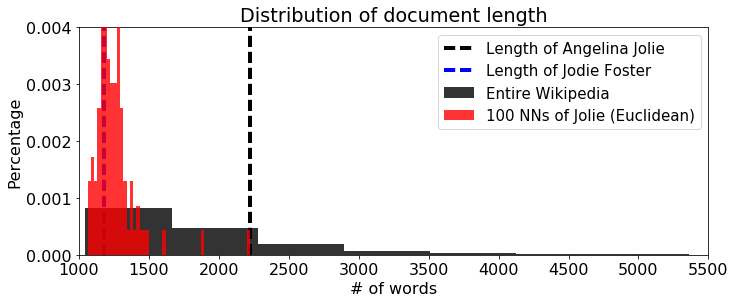

In [37]:
plt.figure(figsize=(10.5,4.5))
plt.hist(wiki['length'], 50, color='k', edgecolor='None', histtype='stepfilled', normed=True,
         label='Entire Wikipedia', zorder=3, alpha=0.8)
plt.hist(nearest_neighbors_euclidean['length'], 50, color='r', edgecolor='None', histtype='stepfilled', normed=True,
         label='100 NNs of Jolie (Euclidean)', zorder=10, alpha=0.8)
plt.axvline(x=wiki['length'][wiki['name'] == 'Angelina Jolie'][0], color='k', linestyle='--', linewidth=4,
           label='Length of Angelina Jolie', zorder=2)
plt.axvline(x=wiki['length'][wiki['name'] == 'Jodie Foster'][0], color='b', linestyle='--', linewidth=4,
           label='Length of Jodie Foster', zorder=1)
plt.axis([1000, 5500, 0, 0.004])

plt.legend(loc='best', prop={'size':15})
plt.title('Distribution of document length')
plt.xlabel('# of words')
plt.ylabel('Percentage')
plt.rcParams.update({'font.size':16})
plt.tight_layout()

Relative to the rest of Wikipedia, nearest neighbors of Obama are overwhemingly short, most of them being shorter than 2000 words. The bias towards short articles is not appropriate in this application as there is really no reason to  favor short articles over long articles (they are all Wikipedia articles, after all). Many Wikipedia articles are 2500 words or more, and both Obama and Biden are over 2500 words long. 

**Note:** Both word-count features and TF-IDF are proportional to word frequencies. While TF-IDF penalizes very common words, longer articles tend to have longer TF-IDF vectors simply because they have more words in them.

To remove this bias, we turn to **cosine distances**:
$$
d(\mathbf{x},\mathbf{y}) = 1 - \frac{\mathbf{x}^T\mathbf{y}}{\|\mathbf{x}\| \|\mathbf{y}\|}
$$
Cosine distances let us compare word distributions of two articles of varying lengths.

Let us train a new nearest neighbor model, this time with cosine distances.  We then repeat the search for Obama's 100 nearest neighbors.

In [38]:
model2_tf_idf = graphlab.nearest_neighbors.create(wiki, label='name', features=['tf_idf'],
                                                  method='brute_force', distance='cosine')

Starting brute force nearest neighbors model training.

In [39]:
nearest_neighbors_cosine = model2_tf_idf.query(wiki[wiki['name'] == 'Angelina Jolie'], label='name', k=100)
nearest_neighbors_cosine = nearest_neighbors_cosine.join(wiki[['name', 'length']], on={'reference_label':'name'})

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 19.96ms      |

| Done         |         | 100         | 451.084ms    |

+--------------+---------+-------------+--------------+

In [40]:
nearest_neighbors_cosine.sort('rank')

query_label,reference_label,distance,rank,length
Angelina Jolie,Angelina Jolie,0.0,1,2222
Angelina Jolie,Brad Pitt,0.730168606132,2,1985
Angelina Jolie,Barbara Hershey,0.761752081266,3,2000
Angelina Jolie,Keith Jolie,0.770688506797,4,2926
Angelina Jolie,Julianne Moore,0.776274899793,5,1882
Angelina Jolie,Glenn Close,0.778902411817,6,2266
Angelina Jolie,Jodie Foster,0.779229924001,7,1181
Angelina Jolie,Maggie Smith,0.781508121637,8,3642
Angelina Jolie,Jessica Chastain,0.78619216065,9,1260
Angelina Jolie,Amy Adams,0.787463892452,10,1609


From a glance at the above table, things look better.  For example, we now see Joe Biden as Barack Obama's nearest neighbor!  We also see Hillary Clinton on the list.  This list looks even more plausible as nearest neighbors of Barack Obama.

Let's make a plot to better visualize the effect of having used cosine distance in place of Euclidean on our TF-IDF vectors.

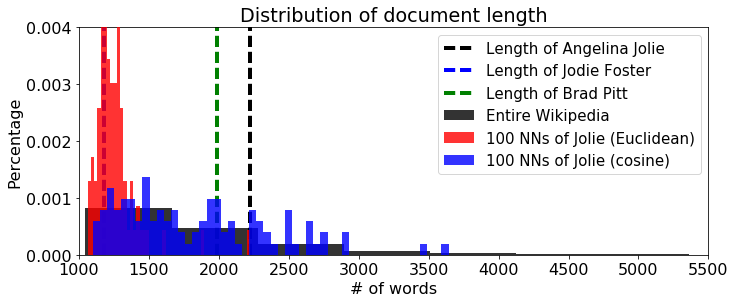

In [42]:
plt.figure(figsize=(10.5,4.5))
plt.figure(figsize=(10.5,4.5))
plt.hist(wiki['length'], 50, color='k', edgecolor='None', histtype='stepfilled', normed=True,
         label='Entire Wikipedia', zorder=3, alpha=0.8)
plt.hist(nearest_neighbors_euclidean['length'], 50, color='r', edgecolor='None', histtype='stepfilled', normed=True,
         label='100 NNs of Jolie (Euclidean)', zorder=10, alpha=0.8)
plt.hist(nearest_neighbors_cosine['length'], 50, color='b', edgecolor='None', histtype='stepfilled', normed=True,
         label='100 NNs of Jolie (cosine)', zorder=11, alpha=0.8)
plt.axvline(x=wiki['length'][wiki['name'] == 'Angelina Jolie'][0], color='k', linestyle='--', linewidth=4,
           label='Length of Angelina Jolie', zorder=2)
plt.axvline(x=wiki['length'][wiki['name'] == 'Jodie Foster'][0], color='b', linestyle='--', linewidth=4,
           label='Length of Jodie Foster', zorder=1)
plt.axvline(x=wiki['length'][wiki['name'] == 'Brad Pitt'][0], color='g', linestyle='--', linewidth=4,
           label='Length of Brad Pitt', zorder=1)
plt.axis([1000, 5500, 0, 0.004])
plt.legend(loc='best', prop={'size':15})
plt.title('Distribution of document length')
plt.xlabel('# of words')
plt.ylabel('Percentage')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()

Indeed, the 100 nearest neighbors using cosine distance provide a sampling across the range of document lengths, rather than just short articles like Euclidean distance provided.

**Moral of the story**: In deciding the features and distance measures, check if they produce results that make sense for your particular application.

# Problem with cosine distances: tweets vs. long articles

Happily ever after? Not so fast. Cosine distances ignore all document lengths, which may be great in certain situations but not in others. For instance, consider the following (admittedly contrived) example.

```
+--------------------------------------------------------+
|                                             +--------+ |
|  One that shall not be named                | Follow | |
|  @username                                  +--------+ |
|                                                        |
|  Democratic governments control law in response to     |
|  popular act.                                          |
|                                                        |
|  8:05 AM - 16 May 2016                                 |
|                                                        |
|  Reply   Retweet (1,332)   Like (300)                  |
|                                                        |
+--------------------------------------------------------+
```

How similar is this tweet to Barack Obama's Wikipedia article? Let's transform the tweet into TF-IDF features, using an encoder fit to the Wikipedia dataset.  (That is, let's treat this tweet as an article in our Wikipedia dataset and see what happens.)

In [43]:
sf = graphlab.SFrame({'text': ['Bollywood actress apologizes after outrage over refugee t-shirt cover']})
sf['word_count'] = graphlab.text_analytics.count_words(sf['text'])

encoder = graphlab.feature_engineering.TFIDF(features=['word_count'], output_column_prefix='tf_idf')
encoder.fit(wiki)
sf = encoder.transform(sf)
sf

text,word_count,tf_idf.word_count
Bollywood actressapologizes after outrage ...,"{'apologizes': 1,'refugee': 1, 'after' ...","{'apologizes':10.986495389225194, ..."


Let's look at the TF-IDF vectors for this tweet and for Barack Obama's Wikipedia entry, just to visually see their differences.

In [44]:
tweet_tf_idf = sf[0]['tf_idf.word_count']
tweet_tf_idf

{'actress': 3.318869297640204,
 'after': 0.9443334420013064,
 'apologizes': 10.986495389225194,
 'bollywood': 5.810345656651365,
 'cover': 3.7092476625937105,
 'outrage': 7.157853992736099,
 'over': 1.4878231559557336,
 'refugee': 5.510031837293684}

In [45]:
obama = wiki[wiki['name'] == 'Angelina Jolie']
obama

Columns:
	URI	str
	name	str
	text	str
	word_count	dict
	has_top_words	int
	tf_idf	dict
	length	int

Rows: Unknown

Data:
+-------------------------------+----------------+
|              URI              |      name      |
+-------------------------------+----------------+
| <http://dbpedia.org/resour... | Angelina Jolie |
+-------------------------------+----------------+
+-------------------------------+-------------------------------+---------------+
|              text             |           word_count          | has_top_words |
+-------------------------------+-------------------------------+---------------+
| angelina jolie doli johlee... | {'salt': 1, 'producer': 1,... |       1       |
+-------------------------------+-------------------------------+---------------+
+-------------------------------+--------+
|             tf_idf            | length |
+-------------------------------+--------+
| {'salt': 4.932056042955824... |  2222  |
+-------------------------------+--------+
[? rows x 7 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

Now, compute the cosine distance between the Angelina Jolie article and this tweet:

In [46]:
obama_tf_idf = obama[0]['tf_idf']
graphlab.toolkits.distances.cosine(obama_tf_idf, tweet_tf_idf)

0.9624314325198016

Let's compare this distance to the distance between the Angelina Jolie article and all of its Wikipedia 10 nearest neighbors:

In [47]:
model2_tf_idf.query(obama, label='name', k=10)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 16.658ms     |

| Done         |         | 100         | 484.636ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
Angelina Jolie,Angelina Jolie,0.0,1
Angelina Jolie,Brad Pitt,0.730168606132,2
Angelina Jolie,Barbara Hershey,0.761752081266,3
Angelina Jolie,Keith Jolie,0.770688506797,4
Angelina Jolie,Julianne Moore,0.776274899793,5
Angelina Jolie,Glenn Close,0.778902411817,6
Angelina Jolie,Jodie Foster,0.779229924001,7
Angelina Jolie,Maggie Smith,0.781508121637,8
Angelina Jolie,Jessica Chastain,0.78619216065,9
Angelina Jolie,Amy Adams,0.787463892452,10


With cosine distances, the tweet is "nearer" to Angelina Jolie than everyone else, and with quite a big difference!  This probably is not something we want. If someone is reading the Angelina Jolie Wikipedia page, would you want to recommend them reading this tweet about a Bolywood actress? Probably not. 

Ignoring article lengths completely resulted in nonsensical results. In practice, it is common to enforce maximum or minimum document lengths. After all, when someone is reading a long article from _The Atlantic_, you wouldn't recommend him/her a tweet.